In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
import pandas as pd
def load_data(file_path: str) -> pd.DataFrame:
    """
    Load data from a CSV file into a pandas eom_eom_eom_eom_eom_eom_eom_eom_dataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.eom_dataFrame: A DataFrame containing the loaded data.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error

In [31]:
load_data("yield-curve-rates-1990-2024.csv")

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/24,4.40,4.39,4.37,4.32,4.24,4.16,4.25,4.27,4.38,4.48,4.58,4.86,4.78
1,12/30/24,4.43,4.42,4.37,4.33,4.25,4.17,4.24,4.29,4.37,4.46,4.55,4.84,4.77
2,12/27/24,4.44,4.43,4.31,4.35,4.29,4.20,4.31,4.36,4.45,4.53,4.62,4.89,4.82
3,12/26/24,4.45,4.45,4.35,4.37,4.31,4.23,4.30,4.35,4.42,4.49,4.58,4.83,4.76
4,12/24/24,4.44,4.44,4.40,4.38,4.30,4.24,4.29,4.36,4.43,4.52,4.59,4.84,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,1/8/90,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8753,1/5/90,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8754,1/4/90,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8755,1/3/90,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


In [32]:
df=load_data("yield-curve-rates-1990-2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.set_index('Date')


/var/folders/y3/nzngm7d50bs8pgqzzcqgkwzh0000gn/T/ipykernel_38113/1082480317.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [33]:
# For each year-month, get the last available row
eom_data = df.groupby([df.index.year, df.index.month]).tail(1).reset_index()
eom_data = eom_data.sort_values('Date', ascending=False)
eom_data


,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
419,2024-12-31,4.40,4.39,4.37,4.32,4.24,4.16,4.25,4.27,4.38,4.48,4.58,4.86,4.78
418,2024-11-29,4.76,4.69,4.58,4.52,4.42,4.30,4.13,4.10,4.05,4.10,4.18,4.45,4.36
417,2024-10-31,4.76,4.76,4.64,4.56,4.43,4.27,4.16,4.12,4.15,4.21,4.28,4.58,4.47
416,2024-09-30,4.93,4.87,4.73,4.65,4.38,3.98,3.66,3.58,3.58,3.67,3.81,4.19,4.14
415,2024-08-30,5.41,5.32,5.21,5.12,4.89,4.38,3.91,3.79,3.71,3.80,3.91,4.28,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1990-05-31,NaN,NaN,8.01,NaN,8.12,8.22,8.50,8.53,8.56,8.64,8.60,NaN,8.58
3,1990-04-30,NaN,NaN,8.07,NaN,8.44,8.58,8.96,9.05,9.04,9.06,9.04,NaN,9.00
2,1990-03-30,NaN,NaN,8.07,NaN,8.24,8.35,8.64,8.69,8.65,8.70,8.65,NaN,8.63
1,1990-02-28,NaN,NaN,8.04,NaN,8.14,8.12,8.43,8.45,8.44,8.54,8.51,NaN,8.54


In [34]:
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-lambd * tau)) / (lambd * tau))
    term3 = beta2 * (((1 - np.exp(-lambd * tau)) / (lambd * tau)) - np.exp(-lambd * tau))
    return term1 + term2 + term3


In [55]:
from scipy.optimize import curve_fit
from tqdm import tqdm

# Initialize lists to store the estimated parameters
beta0_list = []
beta1_list = []
beta2_list = []
dates_list = []

# Define the maturity points (in years)
tau = np.array([1/12, 1/6, 0.25, 1/3, 0.5, 1, 2, 3, 5, 7, 10, 20, 30])

# Fix lambda to a constant value (e.g., 0.0609 as suggested by Diebold and Li)
lambd = 0.0609

# Get the yield columns (excluding Date)
yield_columns = ['1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']

# Iterate over each date to fit the NS model
for idx, row in tqdm(eom_data.iterrows(), total=len(eom_data)):
    # Get yields for this date and convert to float
    yields = row[yield_columns].astype(float).values

    # Skip if there are too many NaN values
    if np.sum(np.isnan(yields)) > 3:
        continue

    # Remove NaN values and corresponding tau values
    valid_mask = ~np.isnan(yields)
    valid_tau = tau[valid_mask]
    valid_yields = yields[valid_mask]

    try:
        popt, _ = curve_fit(lambda t, b0, b1, b2: nelson_siegel(t, b0, b1, b2, lambd),
                            valid_tau, valid_yields,
                            p0=[0.03, -0.02, 0.02],
                            maxfev=10000)
        beta0_list.append(popt[0])
        beta1_list.append(popt[1])
        beta2_list.append(popt[2])
        dates_list.append(row['Date'])
    except RuntimeError:
        continue

# Create a DataFrame to store the estimated parameters
betas = pd.DataFrame({
    'Date': dates_list,
    'beta0': beta0_list,
    'beta1': beta1_list,
    'beta2': beta2_list
})

# Sort by date
betas = betas.sort_values('Date', ascending=False)

# Display the first few rows
print("Estimated Parameters:")

print(betas.head())

# Display the shape of the results
print(f"\nShape of estimated parameters: {betas.shape}")

100%|██████████| 420/420 [00:00<00:00, 1999.70it/s]

Estimated Parameters:
        Date      beta0     beta1      beta2
0 2024-12-31   5.360124 -1.082502  -0.020109
1 2024-11-29   8.275247 -3.755205  -6.807402
2 2024-10-31   8.096599 -3.558930  -6.130766
3 2024-09-30  12.240761 -7.702348 -14.338233
4 2024-08-30  14.078224 -9.074033 -18.014578

Shape of estimated parameters: (375, 4)


In [56]:
betas

,Date,beta0,beta1,beta2
0,2024-12-31,5.360124,-1.082502,-0.020109
1,2024-11-29,8.275247,-3.755205,-6.807402
2,2024-10-31,8.096599,-3.558930,-6.130766
3,2024-09-30,12.240761,-7.702348,-14.338233
4,2024-08-30,14.078224,-9.074033,-18.014578
...,...,...,...,...
370,1994-02-28,-2.623653,6.255792,21.079096
371,1994-01-31,-2.198479,5.340114,19.688210
372,1993-12-31,-2.944079,6.143024,21.338019
373,1993-11-30,-2.578538,5.841641,20.461889


In [40]:
from statsmodels.tsa.api import VAR
betas_ts = betas.set_index('Date')[['beta0', 'beta1', 'beta2']]

# Fit the VAR model
model = VAR(betas_ts)
results = model.fit(maxlags=15, ic='aic')

# Print the summary of the model
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Jun, 2025
Time:                     19:23:50
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -2.32844
Nobs:                     372.000    HQIC:                  -2.51897
Log likelihood:          -1061.66    FPE:                  0.0710451
AIC:                     -2.64448    Det(Omega_mle):       0.0656104
--------------------------------------------------------------------
Results for equation beta0
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.556276         0.410783            1.354           0.176
L1.beta0         0.579941         0.648581            0.894           0.371
L1.beta1         0.086910         0.561932            0.155           0.877
L1.b

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
# Define the number of steps to forecast
forecast_steps = 12  # e.g., 12 months ahead

# Forecast future NS parameters
forecast = results.forecast(betas_ts.values[-results.k_ar:], steps=forecast_steps)

# Create a DataFrame for the forecasted parameters
forecast_index = pd.date_range(start=betas_ts.index[0] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_betas = pd.DataFrame(forecast, index=forecast_index, columns=['beta0', 'beta1', 'beta2'])
forecast_betas

,beta0,beta1,beta2
2025-01-31,-1.262424,4.400594,17.193733
2025-02-28,-1.452204,4.576738,17.552816
2025-03-31,-1.391677,4.516185,17.397503
2025-04-30,-1.291377,4.417952,17.150375
2025-05-31,-1.203539,4.336872,16.937619
2025-06-30,-1.128791,4.270616,16.751967
2025-07-31,-1.054220,4.205785,16.566304
2025-08-31,-0.982262,4.144180,16.385362
2025-09-30,-0.914237,4.086832,16.212177
2025-10-31,-0.850186,4.033519,16.046787


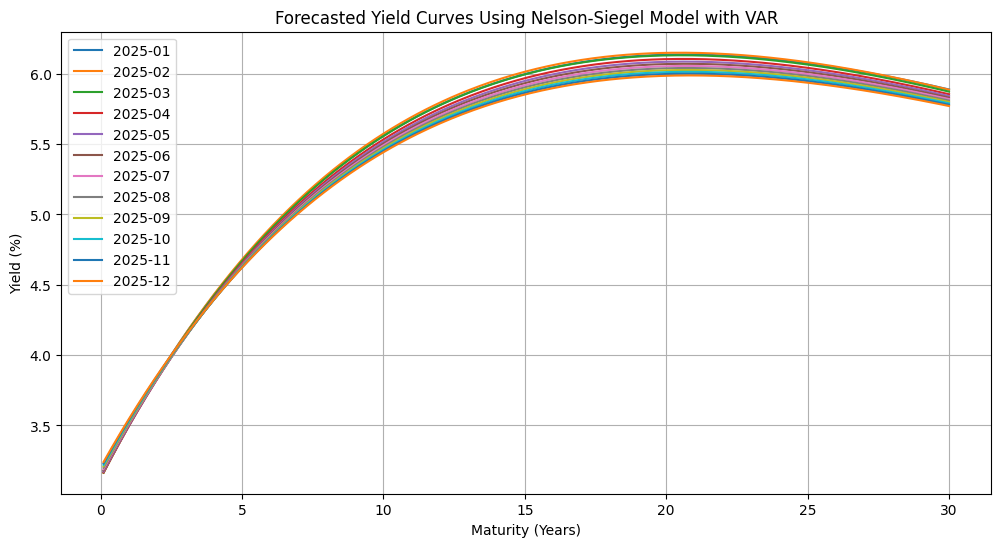

In [52]:
# Define a range of maturities for plotting
tau_plot = np.linspace(0.1, 30, 300)
yields_vector = []
# Plot the forecasted yield curves
plt.figure(figsize=(12, 6))
for date in forecast_betas.index:
    beta0, beta1, beta2 = forecast_betas.loc[date]
    yields = nelson_siegel(tau_plot, beta0, beta1, beta2, lambd)
    yields_vector.append(yields)
    plt.plot(tau_plot, yields, label=date.strftime('%Y-%m'))

plt.title('Forecasted Yield Curves Using Nelson-Siegel Model with VAR')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
yields_vector


[array([3.17693998, 3.21534211, 3.25337881, 3.29105271, 3.3283664 ,
        3.36532247, 3.40192349, 3.43817202, 3.47407058, 3.50962169,
        3.54482786, 3.57969157, 3.61421528, 3.64840145, 3.68225252,
        3.71577089, 3.74895898, 3.78181918, 3.81435384, 3.84656534,
        3.878456  , 3.91002815, 3.94128411, 3.97222616, 4.00285658,
        4.03317763, 4.06319157, 4.09290062, 4.122307  , 4.15141292,
        4.18022056, 4.2087321 , 4.23694969, 4.26487549, 4.29251162,
        4.3198602 , 4.34692332, 4.37370309, 4.40020157, 4.42642082,
        4.45236289, 4.47802981, 4.5034236 , 4.52854627, 4.55339981,
        4.5779862 , 4.6023074 , 4.62636537, 4.65016204, 4.67369934,
        4.6969792 , 4.72000349, 4.74277413, 4.76529297, 4.78756188,
        4.80958272, 4.83135732, 4.8528875 , 4.87417508, 4.89522187,
        4.91602964, 4.93660018, 4.95693525, 4.9770366 , 4.99690598,
        5.01654511, 5.03595572, 5.0551395 , 5.07409816, 5.09283338,
        5.11134683, 5.12964016, 5.14771504, 5.16